In [29]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('climate_action_data.csv')
df.head()

,Sensor_ID,Date,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Crop_Type,Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm),Drone_Image_ID
0,SEN-1000,2025-01-01,36.22,6.98,21.3,50.4,Tomatoes,67.6,26.6,IMG-2000
1,SEN-1001,2025-01-02,76.55,5.03,23.5,34.3,Wheat,130.4,8.3,IMG-2001
2,SEN-1002,2025-01-03,61.24,6.52,21.9,54.6,Tomatoes,36.0,29.4,IMG-2002
3,SEN-1003,2025-01-04,51.91,6.62,24.0,48.7,Maize,85.8,19.6,IMG-2003
4,SEN-1004,2025-01-05,20.92,5.98,19.2,70.6,Wheat,75.6,29.9,IMG-2004


In [30]:

df.dtypes
df.shape
df.describe().T

,count,unique,top,freq
Sensor_ID,913,800,SEN-1430,2
Date,909,798,2026-09-10,2
Soil_Moisture(%),913,750,error,5
Soil_pH,913,313,7.54,11
Temperature(C),913,170,19.1,13
Humidity(%),913,448,56.0,8
Crop_Type,909,5,Wheat,203
Fertilizer_Recommended(kg/ha),913,595,66.9,8
Irrigation_Recommended(mm),913,243,8.0,11
Drone_Image_ID,913,800,IMG-2430,2


In [31]:
#checking for null values
df.isnull().sum()

Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        4
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64

In [32]:
#filling null values of crop type
df['Crop_Type'] = df['Crop_Type'].fillna(df['Crop_Type'].mode()[0])
df.isnull().sum()

Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        0
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64

In [33]:
#handling wrong data formats
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df.isnull().sum()

Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        0
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64

In [34]:
#handling wrong data formats
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

numeric_cols = ['Soil_Moisture(%)', 'Soil_pH', 'Temperature(C)', 'Humidity(%)', 'Fertilizer_Recommended(kg/ha)','Irrigation_Recommended(mm)']
for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to numeric, coercing errors to NaN
# Fill NaN values in 'Volume' with the median
        df[col] = df[col].fillna(df[col].mean())

In [35]:
#handling wrong datatypes
statistics_cols = ['Soil_Moisture(%)', 'Soil_pH', 'Temperature(C)', 'Humidity(%)', 'Fertilizer_Recommended(kg/ha)', 'Irrigation_Recommended(mm)']
for col in statistics_cols:
    if col in df.columns:
        mean = df[col].mean()
        std = df[col].std()
        df[col] = np.where((df[col] < mean - 3*std) | (df[col] > mean + 3*std), np.nan, df[col])
        df[col] = df[col].fillna(df[col].median())

df.head()        

,Sensor_ID,Date,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Crop_Type,Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm),Drone_Image_ID
0,SEN-1000,2025-01-01,36.22,6.98,21.3,50.4,Tomatoes,67.6,26.6,IMG-2000
1,SEN-1001,2025-01-02,76.55,5.03,23.5,34.3,Wheat,130.4,8.3,IMG-2001
2,SEN-1002,2025-01-03,61.24,6.52,21.9,54.6,Tomatoes,36.0,29.4,IMG-2002
3,SEN-1003,2025-01-04,51.91,6.62,24.0,48.7,Maize,85.8,19.6,IMG-2003
4,SEN-1004,2025-01-05,20.92,5.98,19.2,70.6,Wheat,75.6,29.9,IMG-2004


In [36]:
#duplicated values
print('duplicated values')
df.duplicated().sum()

duplicated values


np.int64(111)

In [37]:
#handling duplicated values
df.drop_duplicates()
print('rows after cleaning', df.shape[0])
print('date duplicates', df['Date'].duplicated().sum())
df = df.drop_duplicates(subset=['Date'], keep='first')
df.shape

rows after cleaning 913
date duplicates 114


(799, 10)

In [38]:
#final clean dataset
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 799 entries, 0 to 863
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Sensor_ID                      799 non-null    object        
 1   Date                           798 non-null    datetime64[ns]
 2   Soil_Moisture(%)               799 non-null    float64       
 3   Soil_pH                        799 non-null    float64       
 4   Temperature(C)                 799 non-null    float64       
 5   Humidity(%)                    799 non-null    float64       
 6   Crop_Type                      799 non-null    object        
 7   Fertilizer_Recommended(kg/ha)  799 non-null    float64       
 8   Irrigation_Recommended(mm)     799 non-null    float64       
 9   Drone_Image_ID                 799 non-null    object        
dtypes: datetime64[ns](1), float64(6), object(3)
memory usage: 68.7+ KB


Sensor_ID                        0
Date                             1
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        0
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64

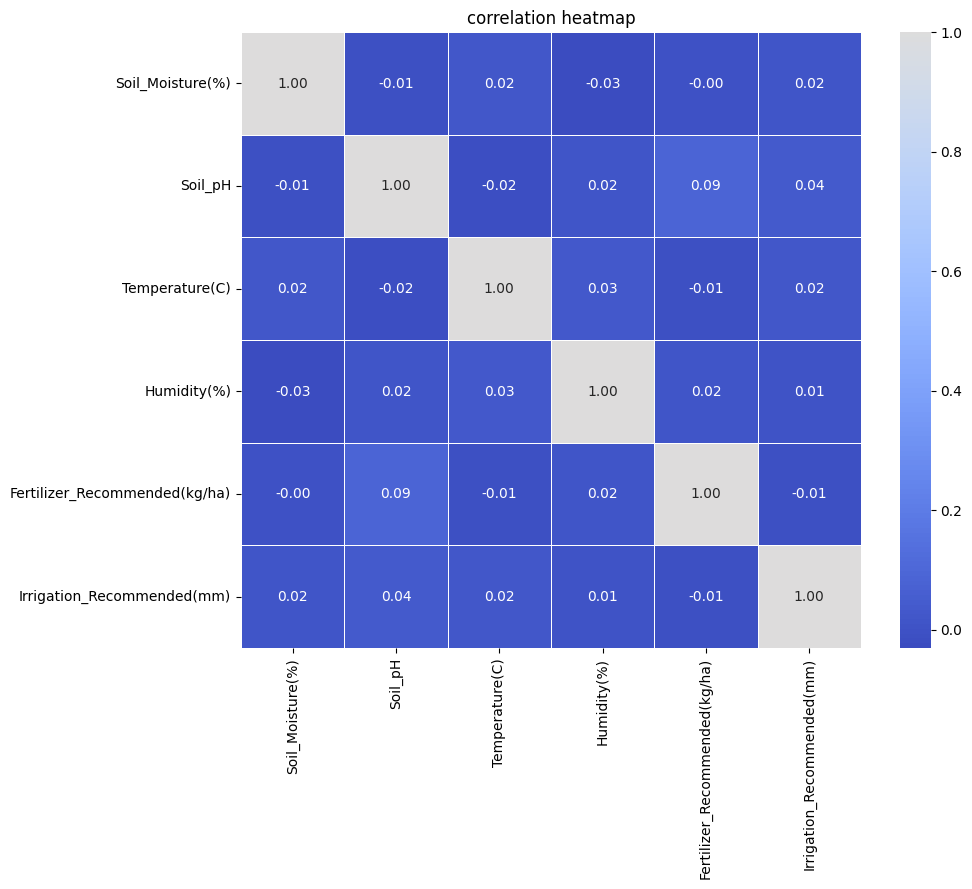

In [42]:
#analysis of the data
corr_matrix =df[['Soil_Moisture(%)', 'Soil_pH', 'Temperature(C)', 'Humidity(%)', 'Fertilizer_Recommended(kg/ha)','Irrigation_Recommended(mm)']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, center=True)
plt.title('correlation heatmap')
plt.show()

In [43]:
#analysis, identify which variables most influence fertilizer recommendations
#variables most influencing fertilizer recommendation
if 'Fertilizer_Recommended(kg/ha)' in df.columns:
    num_col = df.select_dtypes(include='number').columns
    cor_mx = df[num_col].corr()
    fert = cor_mx['Fertilizer_Recommended(kg/ha)'].sort_values(ascending=False)
print('varibles most affecting Fertilizer_Recommended(kg/ha)')
print(fert)    

varibles most affecting Fertilizer_Recommended(kg/ha)
Fertilizer_Recommended(kg/ha)    1.000000
Soil_pH                          0.085342
Humidity(%)                      0.017321
Soil_Moisture(%)                -0.000941
Temperature(C)                  -0.007327
Irrigation_Recommended(mm)      -0.012931
Name: Fertilizer_Recommended(kg/ha), dtype: float64
